<a href="https://colab.research.google.com/github/nora-flynn/Jinkerson_pipeline/blob/main/spRNAseq_barcode_2021_10_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cd /rhome/rjinkers/bigdata/spRNAseq/obsutil_linux_amd64_5.3.4/210827_A00838_0539_AHH3JFDSX2

/bigdata/jinkersonlab/rjinkers/spRNAseq/obsutil_linux_amd64_5.3.4/210827_A00838_0539_AHH3JFDSX2


In [ ]:
ls

002/                            copy.end               test1/
80.R1.unmatched1.fq             list_of_sequences.txt  unmatched1.fq
80.unmatched1.fq                matched1.fq            unmatched1.fq.R1
B400_L3_A001.R1.fastq.gz        matched1.fq.R2         unmatched1.fq.R2
B400_L3_A001.R2.fastq.1000      matched2.fq            unmatched1.fq.R3
B400_L3_A001.R2.fastq.1000.flt  md5.txt                unmatched2.fq
B400_L3_A001.R2.fastq.gz        report
QCFILE/                         stats.txt


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#import seaborn as sns
import collections
import time
date = time.strftime("%Y.%m.%d")

In [ ]:
# R1 extract barcodes for R1

In [ ]:
# open file, read seq into list
filename = "80.R1.unmatched1.fq"
filename = "unmatched1.fq.R1"

with open(filename) as f:
    lines = f.readlines()

#desired_lines = lines[start:end:step]

In [ ]:
# extract last 8 nt from sequences which contain the barcode
l_bc = [seq[-9:-1] for seq in lines[1::4]]
l_readname = [name for name in lines[0::4]]
print(len(l_bc))
print(len(l_readname))

311739
311739


In [ ]:
# add reads to dict
d = collections.defaultdict(dict)
for readname, seq in zip(l_readname,l_bc):
    d[readname]['R1']=seq

In [ ]:
# use counter to aggregate sequences
from collections import Counter
c_bc = Counter(l_bc)
len(c_bc)

In [ ]:
# try to map barcodes onto list of seqs

In [ ]:
l_R1 = ['TGTCTATC', 'TATGTGGC', 'TTACTCGC', 'TCGTTAGC', 'TACCGAGC', 'TGTTCTCC', 'TTCGCACC', 'TTGCGTAC', 'TCTACGAC', 'TGACAGAC', 'TAGAACAC', 'TCATCCTA', 'TGCTGATA', 'TAGACGGA', 'TGTGAAGA', 'TCTCTTCA', 'TTGTTCCA', 'TGAAGCCA', 'TACCACCA', 'TGCGTGAA', 'GGTGAGTT', 'GATCTCTT', 'GTGTCCTT', 'GACGGATT', 'GCAACATT', 'GGTCGTGT', 'GAATCTGT', 'GTACATCT', 'GAGGTGCT', 'GCATGGCT', 'GTTAGCCT', 'GTCGCTAT', 'GGAATGAT', 'GAGCCAAT', 'GCTCCTTG', 'GTAAGGTG', 'GAGGATGG', 'GTTGTCGG', 'GGATTAGG', 'GATAGAGG', 'GTGTGTCG', 'GCAATCCG', 'GACCTTAG', 'GCCTGTTC', 'GCACTGTC', 'GCTAACTC', 'GATTCATC', 'GTCTTGGC']
l_R2 = ['ATCACGTT', 'CGATGTTT', 'TTAGGCAT', 'TGACCACT', 'ACAGTGGT', 'GCCAATGT', 'CAGATCTG', 'ACTTGATG', 'GATCAGCG', 'TAGCTTGT', 'GGCTACAG', 'CTTGTACT', 'TGGTTGTT', 'TCTCGGTT', 'TAAGCGTT', 'TCCGTCTT', 'TGTACCTT', 'TTCTGTGT', 'TCTGCTGT', 'TTGGAGGT', 'TCGAGCGT', 'TGATACGT', 'TGCATAGT', 'TTGACTCT', 'TGCGATCT', 'TTCCTGCT', 'TAGTGACT', 'TACAGGAT', 'TCCTCAAT', 'TGTGGTTG', 'TACTAGTC', 'TTCCATTG', 'TCGAAGTG', 'TAACGCTG', 'TTGGTATG', 'TGAACTGG', 'TACTTCGG', 'TCTCACGG', 'TCAGGAGG', 'TAAGTTCG', 'TCCAGTCG', 'TGTATGCG', 'TCATTGAG', 'TGGCTCAG', 'TATGCCAG', 'TCAGATTC', 'TAGTCTTG', 'TTCAGCTC', 'TGTCTATC', 'TATGTGGC', 'TTACTCGC', 'TCGTTAGC', 'TACCGAGC', 'TGTTCTCC', 'TTCGCACC', 'TTGCGTAC', 'TCTACGAC', 'TGACAGAC', 'TAGAACAC', 'TCATCCTA', 'TGCTGATA', 'TAGACGGA', 'TGTGAAGA', 'TCTCTTCA', 'TTGTTCCA', 'TGAAGCCA', 'TACCACCA', 'TGCGTGAA', 'GGTGAGTT', 'GATCTCTT', 'GTGTCCTT', 'GACGGATT', 'GCAACATT', 'GGTCGTGT', 'GAATCTGT', 'GTACATCT', 'GAGGTGCT', 'GCATGGCT', 'GTTAGCCT', 'GTCGCTAT', 'GGAATGAT', 'GAGCCAAT', 'GCTCCTTG', 'GTAAGGTG', 'GAGGATGG', 'GTTGTCGG', 'GGATTAGG', 'GATAGAGG', 'GTGTGTCG', 'GCAATCCG', 'GACCTTAG', 'GCCTGTTC', 'GCACTGTC', 'GCTAACTC', 'GATTCATC', 'GTCTTGGC']
l_R3 = ['ATCACGTT', 'CGATGTTT', 'TTAGGCAT', 'TGACCACT', 'ACAGTGGT', 'GCCAATGT', 'CAGATCTG', 'ACTTGATG', 'GATCAGCG', 'TAGCTTGT', 'GGCTACAG', 'CTTGTACT', 'TGGTTGTT', 'TCTCGGTT', 'TAAGCGTT', 'TCCGTCTT', 'TGTACCTT', 'TTCTGTGT', 'TCTGCTGT', 'TTGGAGGT', 'TCGAGCGT', 'TGATACGT', 'TGCATAGT', 'TTGACTCT', 'TGCGATCT', 'TTCCTGCT', 'TAGTGACT', 'TACAGGAT', 'TCCTCAAT', 'TGTGGTTG', 'TACTAGTC', 'TTCCATTG', 'TCGAAGTG', 'TAACGCTG', 'TTGGTATG', 'TGAACTGG', 'TACTTCGG', 'TCTCACGG', 'TCAGGAGG', 'TAAGTTCG', 'TCCAGTCG', 'TGTATGCG', 'TCATTGAG', 'TGGCTCAG', 'TATGCCAG', 'TCAGATTC', 'TAGTCTTG', 'TTCAGCTC', 'TGTCTATC', 'TATGTGGC', 'TTACTCGC', 'TCGTTAGC', 'TACCGAGC', 'TGTTCTCC', 'TTCGCACC', 'TTGCGTAC', 'TCTACGAC', 'TGACAGAC', 'TAGAACAC', 'TCATCCTA', 'TGCTGATA', 'TAGACGGA', 'TGTGAAGA', 'TCTCTTCA', 'TTGTTCCA', 'TGAAGCCA', 'TACCACCA', 'TGCGTGAA', 'GGTGAGTT', 'GATCTCTT', 'GTGTCCTT', 'GACGGATT', 'GCAACATT', 'GGTCGTGT', 'GAATCTGT', 'GTACATCT', 'GAGGTGCT', 'GCATGGCT', 'GTTAGCCT', 'GTCGCTAT', 'GGAATGAT', 'GAGCCAAT', 'GCTCCTTG', 'GTAAGGTG', 'GAGGATGG', 'GTTGTCGG', 'GGATTAGG', 'GATAGAGG', 'GTGTGTCG', 'GCAATCCG', 'GACCTTAG', 'GCCTGTTC', 'GCACTGTC', 'GCTAACTC', 'GATTCATC', 'GTCTTGGC']

In [ ]:
for bc in l_R1:
    print(bc,c_bc[bc])

TGTCTATC 1635
TATGTGGC 3035
TTACTCGC 2990
TCGTTAGC 3116
TACCGAGC 3273
TGTTCTCC 2110
TTCGCACC 1454
TTGCGTAC 1048
TCTACGAC 2042
TGACAGAC 8628
TAGAACAC 4863
TCATCCTA 2807
TGCTGATA 3372
TAGACGGA 9736
TGTGAAGA 8675
TCTCTTCA 2063
TTGTTCCA 1756
TGAAGCCA 2273
TACCACCA 2319
TGCGTGAA 3177
GGTGAGTT 13426
GATCTCTT 5045
GTGTCCTT 2193
GACGGATT 13332
GCAACATT 9090
GGTCGTGT 5047
GAATCTGT 3660
GTACATCT 3384
GAGGTGCT 7564
GCATGGCT 3149
GTTAGCCT 2650
GTCGCTAT 1976
GGAATGAT 14408
GAGCCAAT 10545
GCTCCTTG 4677
GTAAGGTG 12889
GAGGATGG 13476
GTTGTCGG 3376
GGATTAGG 11928
GATAGAGG 13194
GTGTGTCG 4375
GCAATCCG 4775
GACCTTAG 11289
GCCTGTTC 3575
GCACTGTC 6466
GCTAACTC 4289
GATTCATC 4750
GTCTTGGC 4847


In [ ]:
c_bc

Counter({'TTACTCGC': 2990,
         'GGAATGAT': 14408,
         'TGACAGAC': 8628,
         'GCAACATT': 9090,
         'GACGGATT': 13332,
         'TCTCTTCA': 2063,
         'GACCTTAG': 11289,
         'TTCGCACC': 1454,
         'GATAGAGG': 13194,
         'TCACATCA': 3638,
         'TGTGAAGA': 8675,
         'GAGGTGCT': 7564,
         'T': 107,
         'GTTAGCCT': 2650,
         'TAGACGGA': 9736,
         'GATCTCTT': 5045,
         'GGTGAGTT': 13426,
         'GCAATCCG': 4775,
         'GTAAGGTG': 12889,
         'GGATTAGG': 11928,
         'GAGGTGAT': 45,
         'TACCACCA': 2319,
         'GCATGGCT': 3149,
         'TATGTGGC': 3035,
         'GATTCATC': 4750,
         'GCATGGAT': 13,
         'GGTCGTTT': 22,
         'TGCGTGAA': 3177,
         'GAATCTGT': 3660,
         'TCGTTAGC': 3116,
         'GCACTGTC': 6466,
         'GAGGATGG': 13476,
         'GAGCCAAT': 10545,
         'GTGTCCTT': 2193,
         'GTACATCT': 3384,
         'CGAGTTCG': 1,
         'GCTCCTTG': 4677,
         

In [ ]:
df =pd.DataFrame(l_bc)

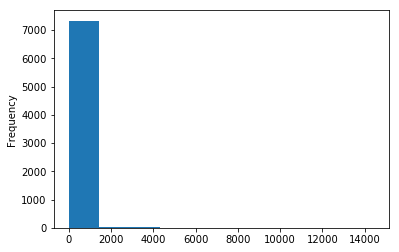

In [ ]:
df[0].value_counts().plot(kind='hist')

# R2

In [ ]:
# R2
filename = "unmatched1.fq.R2"
#filename = "matched1.fq.R2" # this is from R1 with polyG R2

with open(filename) as f:
    lines = f.readlines()

l_bc = [seq[-9:-1] for seq in lines[1::4]]
l_readname = [name for name in lines[0::4]]
print(len(l_bc))
print(len(l_readname))

391332
391332


In [ ]:
# add reads to dict
for readname, seq in zip(l_readname,l_bc):
    d[readname]['R2']=seq

In [ ]:
c_bc = Counter(l_bc)
len(c_bc)

In [ ]:
c_bc.most_common()

[('GGAATGAT', 9369),
 ('GTGTCCTT', 8479),
 ('TAGTCTTG', 8476),
 ('TCAGATTC', 8122),
 ('TGGTTGTT', 7806),
 ('TCATTGAG', 7005),
 ('TAAGTTCG', 6803),
 ('TGTACCTT', 6743),
 ('GATCAGCG', 6610),
 ('GATCTCTT', 6474),
 ('TCCGTCTT', 6004),
 ('TCAGGAGG', 5890),
 ('TTGGTATG', 5679),
 ('TGTTCTCC', 5570),
 ('GGTGAGTT', 5528),
 ('GCACTGTC', 5453),
 ('TTCTGTGT', 5436),
 ('GTCTTGGC', 5390),
 ('GGATTAGG', 5274),
 ('TGTCTATC', 5250),
 ('GTGTGTCG', 5198),
 ('CGATGTTT', 5115),
 ('TAGCTTGT', 5049),
 ('TCCTCAAT', 5007),
 ('GAGGATGG', 4915),
 ('GTGCGACA', 4914),
 ('TCTGCTGT', 4877),
 ('TAGAACAC', 4865),
 ('TTCGCACC', 4834),
 ('GAGCCAAT', 4767),
 ('GACCTTAG', 4730),
 ('GTAAGGTG', 4669),
 ('TTGGAGGT', 4500),
 ('ATCACGTT', 4423),
 ('GCCTGTTC', 4352),
 ('TGCGTGAA', 4322),
 ('TGTGAAGA', 4222),
 ('GTTGTCGG', 4052),
 ('TCTCGGTT', 3940),
 ('TGATACGT', 3866),
 ('GCAACATT', 3829),
 ('GAATCTGT', 3741),
 ('GTCGCTAT', 3684),
 ('ACTTGATG', 3589),
 ('TGTGGTTG', 3555),
 ('TCCAGTCG', 3548),
 ('TACTAGTC', 3474),
 ('GTTAGCCT',

In [ ]:
for bc in l_R2:
    print(bc,c_bc[bc])

ATCACGTT 4423
CGATGTTT 5115
TTAGGCAT 1389
TGACCACT 2713
ACAGTGGT 1822
GCCAATGT 2180
CAGATCTG 2946
ACTTGATG 3589
GATCAGCG 6610
TAGCTTGT 5049
GGCTACAG 2319
CTTGTACT 1
TGGTTGTT 7806
TCTCGGTT 3940
TAAGCGTT 2715
TCCGTCTT 6004
TGTACCTT 6743
TTCTGTGT 5436
TCTGCTGT 4877
TTGGAGGT 4500
TCGAGCGT 1884
TGATACGT 3866
TGCATAGT 3209
TTGACTCT 0
TGCGATCT 2702
TTCCTGCT 3132
TAGTGACT 2152
TACAGGAT 1996
TCCTCAAT 5007
TGTGGTTG 3555
TACTAGTC 3474
TTCCATTG 1639
TCGAAGTG 3186
TAACGCTG 871
TTGGTATG 5679
TGAACTGG 0
TACTTCGG 2369
TCTCACGG 3297
TCAGGAGG 5890
TAAGTTCG 6803
TCCAGTCG 3548
TGTATGCG 2557
TCATTGAG 7005
TGGCTCAG 2395
TATGCCAG 1568
TCAGATTC 8122
TAGTCTTG 8476
TTCAGCTC 0
TGTCTATC 5250
TATGTGGC 1700
TTACTCGC 1215
TCGTTAGC 3191
TACCGAGC 1806
TGTTCTCC 5570
TTCGCACC 4834
TTGCGTAC 3145
TCTACGAC 1653
TGACAGAC 3325
TAGAACAC 4865
TCATCCTA 0
TGCTGATA 1557
TAGACGGA 2902
TGTGAAGA 4222
TCTCTTCA 2718
TTGTTCCA 2835
TGAAGCCA 960
TACCACCA 1898
TGCGTGAA 4322
GGTGAGTT 5528
GATCTCTT 6474
GTGTCCTT 8479
GACGGATT 0
GCAACATT 382

# R3 + UMI

In [ ]:
filename = "unmatched1.fq.R3"
with open(filename) as f:
    lines = f.readlines()

In [ ]:
#R3
l_bc = [seq[:8] for seq in lines[1::4]]
l_readname = [name for name in lines[0::4]]
print(len(l_bc))
print(len(l_readname))

381905
381905


In [ ]:
# add reads to dict
for readname, seq in zip(l_readname,l_bc):
    d[readname]['R3']=seq

In [ ]:
c_bc = Counter(l_bc)
len(c_bc)

8313

In [ ]:
for bc in l_R3:
    print(bc,c_bc[bc])

ATCACGTT 5005
CGATGTTT 4108
TTAGGCAT 5591
TGACCACT 2803
ACAGTGGT 5232
GCCAATGT 5707
CAGATCTG 6356
ACTTGATG 5382
GATCAGCG 4986
TAGCTTGT 3480
GGCTACAG 10993
CTTGTACT 1
TGGTTGTT 3038
TCTCGGTT 4198
TAAGCGTT 5949
TCCGTCTT 1812
TGTACCTT 3265
TTCTGTGT 2265
TCTGCTGT 2927
TTGGAGGT 5325
TCGAGCGT 3721
TGATACGT 3858
TGCATAGT 4271
TTGACTCT 0
TGCGATCT 7852
TTCCTGCT 5013
TAGTGACT 4188
TACAGGAT 3606
TCCTCAAT 2203
TGTGGTTG 3663
TACTAGTC 3483
TTCCATTG 4023
TCGAAGTG 2527
TAACGCTG 2754
TTGGTATG 3163
TGAACTGG 0
TACTTCGG 2900
TCTCACGG 4191
TCAGGAGG 3460
TAAGTTCG 4164
TCCAGTCG 2101
TGTATGCG 3814
TCATTGAG 3017
TGGCTCAG 2942
TATGCCAG 2938
TCAGATTC 2644
TAGTCTTG 1837
TTCAGCTC 0
TGTCTATC 3034
TATGTGGC 2478
TTACTCGC 3646
TCGTTAGC 3104
TACCGAGC 2913
TGTTCTCC 1744
TTCGCACC 2666
TTGCGTAC 3724
TCTACGAC 2589
TGACAGAC 2525
TAGAACAC 2196
TCATCCTA 0
TGCTGATA 2392
TAGACGGA 2742
TGTGAAGA 3741
TCTCTTCA 1884
TTGTTCCA 3316
TGAAGCCA 3531
TACCACCA 2610
TGCGTGAA 2640
GGTGAGTT 3540
GATCTCTT 2779
GTGTCCTT 5113
GACGGATT 0
GCAACATT 

In [ ]:
c_bc.most_common()

[('GGCTACAG', 10993),
 ('\n', 7927),
 ('TGCGATCT', 7852),
 ('CAGATCTG', 6356),
 ('TAAGCGTT', 5949),
 ('GCCAATGT', 5707),
 ('TTAGGCAT', 5591),
 ('ACTTGATG', 5382),
 ('TTGGAGGT', 5325),
 ('ACAGTGGT', 5232),
 ('GATAGAGG', 5191),
 ('GTGTCCTT', 5113),
 ('TTCCTGCT', 5013),
 ('ATCACGTT', 5005),
 ('GATCAGCG', 4986),
 ('GTGTGTCG', 4624),
 ('GGATTAGG', 4390),
 ('TGCATAGT', 4271),
 ('GTTAGCCT', 4214),
 ('TCTCGGTT', 4198),
 ('TCTCACGG', 4191),
 ('TAGTGACT', 4188),
 ('TAAGTTCG', 4164),
 ('CGATGTTT', 4108),
 ('TTCCATTG', 4023),
 ('TGATACGT', 3858),
 ('TGTATGCG', 3814),
 ('GTTGTCGG', 3765),
 ('TGTGAAGA', 3741),
 ('TTGCGTAC', 3724),
 ('TCGAGCGT', 3721),
 ('TGTGGTTG', 3663),
 ('GTACATCT', 3647),
 ('TTACTCGC', 3646),
 ('TACAGGAT', 3606),
 ('GAGCCAAT', 3557),
 ('GGTGAGTT', 3540),
 ('TGAAGCCA', 3531),
 ('TACTAGTC', 3483),
 ('TAGCTTGT', 3480),
 ('GGTCGTGT', 3473),
 ('TCAGGAGG', 3460),
 ('GAGGATGG', 3352),
 ('GCAACATT', 3338),
 ('TTGTTCCA', 3316),
 ('GTCGCTAT', 3302),
 ('TGTACCTT', 3265),
 ('GACCTTAG', 3189

In [ ]:
lines[1::4][0][:8]

'TGCGATCT'

In [ ]:
#UMI
l_bc = [seq[8:17] for seq in lines[1::4]]
l_readname = [name for name in lines[0::4]]
print(len(l_bc))
print(len(l_readname))

381905
381905


In [ ]:
# add reads to dict
for readname, seq in zip(l_readname,l_bc):
    d[readname]['UMI']=seq

In [ ]:
c_bc = Counter(l_bc)
len(c_bc)

In [ ]:
c_bc.most_common()

[('', 23885),
 ('\n', 2398),
 ('CATGAATGG', 1245),
 ('TCAGCATGA', 1025),
 ('TGTCGGGTA', 835),
 ('CACGTCTGA', 804),
 ('A\n', 776),
 ('GTGGCTGCG', 665),
 ('C\n', 612),
 ('AGAGCCGCG', 592),
 ('T\n', 554),
 ('G\n', 506),
 ('CCGCGTACT', 490),
 ('AGCACACGT', 292),
 ('CCCGGTGAA', 289),
 ('CCAAAAACA', 272),
 ('ACGCACGCG', 255),
 ('TGTTTTTGG', 230),
 ('AA\n', 226),
 ('AATAACGGT', 223),
 ('TGGGCACTG', 222),
 ('AC\n', 217),
 ('CA\n', 212),
 ('CTTACCCGA', 209),
 ('AG\n', 176),
 ('GA\n', 175),
 ('TA\n', 164),
 ('AT\n', 164),
 ('CATACATGG', 160),
 ('CC\n', 159),
 ('TC\n', 136),
 ('TT\n', 136),
 ('GCACCTGGA', 131),
 ('GCCCAAAGC', 130),
 ('TGCCCTTGG', 129),
 ('CG\n', 129),
 ('AATCCGCCC', 121),
 ('GATAACGGT', 120),
 ('GT\n', 119),
 ('CT\n', 118),
 ('GC\n', 115),
 ('GG\n', 115),
 ('GAAGAGCAC', 111),
 ('ACGTCTGAA', 109),
 ('TG\n', 108),
 ('GCTCAGGAC', 108),
 ('TCTCAGGAC', 106),
 ('ACGGAGCAA', 106),
 ('TATAACGGT', 98),
 ('ACCAAATCG', 98),
 ('AGATCGGAA', 97),
 ('CTGCGCGTC', 96),
 ('AGTAACGCG', 96),
 ('ATCG

# make df of reads

In [ ]:
# convert dict of barcodes into df
df = pd.DataFrame.from_dict(d,orient='index')

In [ ]:
df['m'] = df.fillna('').sum(axis=1)

In [ ]:
# drop duplicate cells (this would drop duplicate cells with same UMI)
df = df.drop_duplicates()
df.shape

(371822, 5)

In [ ]:
df.shape

(482164, 5)

In [ ]:
len(df.m.unique())

371393

In [ ]:
df.shape

(482164, 5)

In [ ]:
dfd = df.drop_duplicates()

In [ ]:
df_cells = df[['R1','R2','R3']].drop_duplicates()

,R1,R2,R3
@A00838:539:HH3JFDSX2:3:1101:8043:1047 1:N:0:ATCACG+AGATCTCG\n,TTACTCGC,TAGTCTTG,TGCGATCT
@A00838:539:HH3JFDSX2:3:1101:20735:1078 1:N:0:ATCACG+AGATCTCG\n,GGAATGAT,TTCGCACC,GATTCATC
@A00838:539:HH3JFDSX2:3:1101:17336:1141 1:N:0:ATCACG+AGATCTCG\n,TGACAGAC,GAATCTGT,TAGCTTGT
@A00838:539:HH3JFDSX2:3:1101:13340:1172 1:N:0:ATCACG+AGATCTCG\n,GCAACATT,NaN,NaN
@A00838:539:HH3JFDSX2:3:1101:20961:1282 1:N:0:ATCACG+AGATCTCG\n,GACGGATT,GTCTTGGC,TACTAGTC
...,...,...,...
@A00838:539:HH3JFDSX2:3:2674:18304:4038 1:N:0:ATCACG+AGATCTCG\n,NaN,NaN,ATCTGGGC
@A00838:539:HH3JFDSX2:3:2674:1579:35164 1:N:0:ATCACG+AGATCTCG\n,NaN,NaN,GGATTACT
@A00838:539:HH3JFDSX2:3:2677:19859:19100 1:N:0:ATCACG+AGATCTCG\n,NaN,NaN,AGCGGTAC
@A00838:539:HH3JFDSX2:3:2678:25726:8625 1:N:0:ATCACG+AGATCTCG\n,NaN,NaN,ATTCCATT


In [ ]:
df[['R1','R2','R3']]

,R1,R2,R3
@A00838:539:HH3JFDSX2:3:1101:8043:1047 1:N:0:ATCACG+AGATCTCG\n,TTACTCGC,TAGTCTTG,TGCGATCT
@A00838:539:HH3JFDSX2:3:1101:20735:1078 1:N:0:ATCACG+AGATCTCG\n,GGAATGAT,TTCGCACC,GATTCATC
@A00838:539:HH3JFDSX2:3:1101:17336:1141 1:N:0:ATCACG+AGATCTCG\n,TGACAGAC,GAATCTGT,TAGCTTGT
@A00838:539:HH3JFDSX2:3:1101:13340:1172 1:N:0:ATCACG+AGATCTCG\n,GCAACATT,NaN,NaN
@A00838:539:HH3JFDSX2:3:1101:20961:1282 1:N:0:ATCACG+AGATCTCG\n,GACGGATT,GTCTTGGC,TACTAGTC
...,...,...,...
@A00838:539:HH3JFDSX2:3:2678:32651:33426 1:N:0:ATCACG+AGATCTCG\n,NaN,NaN,TAAGCGTT
@A00838:539:HH3JFDSX2:3:2678:13114:35070 1:N:0:ATCACG+AGATCTCG\n,NaN,NaN,AGAAAACT
@A00838:539:HH3JFDSX2:3:2678:21739:35227 1:N:0:ATCACG+AGATCTCG\n,NaN,NaN,GGTGAGTT
@A00838:539:HH3JFDSX2:3:2678:28131:36777 1:N:0:ATCACG+AGATCTCG\n,NaN,NaN,TCAGATTC


In [ ]:
df.groupby(['R1','R2','R3']).count()

UMI  m
R1       R2       R3               
         AACACGTT ACGACCGA     1  1
         AACTAGTC GTTGACGG     1  1
         AAGAACAC TACACGAT     1  1
         AAGTGACT GTAAGCCT     1  1
         AATCCGCT TTCCATTG     1  1
...                          ... ..
TTTTTGGT CAGATCTG TTCCATTG     1  1
         GATCTCTT GTGTGTCG     1  1
         GCAACATT GATCAGCG     1  1
         GCCAATGT TGCATAG\n    1  1
         TCCTCAAT TCATTGAG     1  1

[166049 rows x 2 columns]

In [ ]:
# only keep barcodes that are in the list of barcodes
dfd = df.copy()
for r,l in zip(['R1','R2','R3'],[l_R1,l_R2,l_R3]):
    dfd = dfd.loc[dfd[r].isin(l)]

dfd.shape

(149569, 5)

In [ ]:
# find the freq of UMI for each cell
umi_count = dfd.groupby(['R1','R2','R3']).count()['UMI']
umi_count.value_counts()

# thoughts: need more depth most 'cells' only have a 1 or a few UMI. This would not translate to good coverate

1     72139
2     19892
3      6458
4      2245
5       925
6       351
7       171
8        90
9        39
10       14
12        6
11        5
13        2
Name: UMI, dtype: int64

In [ ]:
# pull barcodesets with given UMI counts
dfd.groupby(['R1','R2','R3']).count().loc[dfd.groupby(['R1','R2','R3']).count()['UMI']>10]

UMI   m
R1       R2       R3               
GACCTTAG GTCTTGGC GGCTACAG   12  12
GACGGATT GTGTCCTT TAGTGACT   13  13
         TCATTGAG GGCTACAG   12  12
                  TCTCGGTT   12  12
GAGCCAAT TGGTTGTT TGTCTATC   12  12
GAGGATGG TAAGTTCG CGATGTTT   11  11
GGAATGAT GCACTGTC GGCTACAG   11  11
         TAAGTTCG CAGATCTG   11  11
                  GAGCCAAT   11  11
GGATTAGG TAGTCTTG CAGATCTG   12  12
GGTGAGTT TCATTGAG GGCTACAG   11  11
GTAAGGTG GTGTCCTT TTAGGCAT   13  13
TAGACGGA TAGTCTTG TAGCTTGT   12  12

In [ ]:
# looking at specific 'cell'
dfd.loc[(dfd.R1=="GACGGATT") & (dfd.R2=="GTGTCCTT") & (dfd.R3=="TAGTGACT")]

# thoughts: it seems like there are all unique UMIs, not just sequencing errors

,R1,R2,R3,UMI,m
@A00838:539:HH3JFDSX2:3:1323:13874:18975 1:N:0:ATCACG+AGATCTCG\n,GACGGATT,GTGTCCTT,TAGTGACT,CAATTTTAC,GACGGATTGTGTCCTTTAGTGACTCAATTTTAC
@A00838:539:HH3JFDSX2:3:1327:10375:36276 1:N:0:ATCACG+AGATCTCG\n,GACGGATT,GTGTCCTT,TAGTGACT,TCTGACCAG,GACGGATTGTGTCCTTTAGTGACTTCTGACCAG
@A00838:539:HH3JFDSX2:3:1403:30698:6872 1:N:0:ATCACG+AGATCTCG\n,GACGGATT,GTGTCCTT,TAGTGACT,AGAATTTCC,GACGGATTGTGTCCTTTAGTGACTAGAATTTCC
@A00838:539:HH3JFDSX2:3:1608:16848:7373 1:N:0:ATCACG+AGATCTCG\n,GACGGATT,GTGTCCTT,TAGTGACT,ACTAGACTC,GACGGATTGTGTCCTTTAGTGACTACTAGACTC
@A00838:539:HH3JFDSX2:3:1640:22489:12508 1:N:0:ATCACG+AGATCTCG\n,GACGGATT,GTGTCCTT,TAGTGACT,CCTGACTTG,GACGGATTGTGTCCTTTAGTGACTCCTGACTTG
@A00838:539:HH3JFDSX2:3:1661:32163:8844 1:N:0:ATCACG+AGATCTCG\n,GACGGATT,GTGTCCTT,TAGTGACT,GAGCTTTGA,GACGGATTGTGTCCTTTAGTGACTGAGCTTTGA
@A00838:539:HH3JFDSX2:3:2126:14733:34522 1:N:0:ATCACG+AGATCTCG\n,GACGGATT,GTGTCCTT,TAGTGACT,AAGAGTAGA,GACGGATTGTGTCCTTTAGTGACTAAGAGTAGA
@A00838:539:HH3JFDSX2:3:2207:22209:16282 1:N:0:ATCACG+AGATCTCG\n,GACGGATT,GTGTCCTT,TAGTGACT,AGGTGGAAT,GACGGATTGTGTCCTTTAGTGACTAGGTGGAAT
@A00838:539:HH3JFDSX2:3:2452:6714:9674 1:N:0:ATCACG+AGATCTCG\n,GACGGATT,GTGTCCTT,TAGTGACT,GCCTACGCT,GACGGATTGTGTCCTTTAGTGACTGCCTACGCT
@A00838:539:HH3JFDSX2:3:2470:32117:12117 1:N:0:ATCACG+AGATCTCG\n,GACGGATT,GTGTCCTT,TAGTGACT,AAAATGCTG,GACGGATTGTGTCCTTTAGTGACTAAAATGCTG
